In [1]:
%matplotlib inline


Skew-T Analysis
===============

Classic skew-T/log-p plot using data from University of Wyoming.

This example uses example data from the University of Wyoming sounding
archive for 12 UTC 31 October 2016 for Minneapolis, MN (MPX) and uses
MetPy to plot the classic skew-T with Temperature, Dewpoint, and wind
barbs.

Adopted from https://unidata.github.io/python-gallery/examples/SkewT_Example.html


In [2]:
from datetime import datetime

import matplotlib.pyplot as plt
from metpy.plots import SkewT
from metpy.units import pandas_dataframe_to_unit_arrays, units
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir

Set time using a datetime object and station as variables




In [3]:
dt = datetime(2016, 10, 26, 12)
station = 'MPX'

Grab Remote Data
----------------

This requires an internet connection to access the sounding data from a
remote server at the University of Wyoming.




In [4]:
# Read remote sounding data based on time (dt) and station
df = WyomingUpperAir.request_data(dt, station)

df

pressure  height  temperature  dewpoint  direction  speed     u_wind  \
0       984.0     287          6.6       6.2      105.0    3.0  -2.897777   
1       979.0     329          6.4       5.4      105.0    6.0  -5.795555   
2       946.3     610          4.6       4.0      105.0   23.0 -22.216294   
3       925.0     798          3.4       3.0      115.0   25.0 -22.657695   
4       911.8     914          2.8       2.4      120.0   27.0 -23.382686   
..        ...     ...          ...       ...        ...    ...        ...   
123      20.0   26230        -55.9     -69.9      260.0   20.0  19.696155   
124      19.5   26391        -55.1     -70.1      262.0   20.0  19.805361   
125      16.6   27432        -57.1     -69.7      275.0   23.0  22.912478   
126      15.0   28042        -58.3     -69.5      290.0   22.0  20.673238   
127      14.8   28138        -58.5     -69.5        NaN    NaN        NaN   

        v_wind station  station_number                time  latitude  \
0     0.776457     MPX           72649 2016-10-26 12:00:00     44.85   
1     1.552914     MPX           72649 2016-10-26 12:00:00     44.85   
2     5.952838     MPX           72649 2016-10-26 12:00:00     44.85   
3    10.565457     MPX           72649 2016-10-26 12:00:00     44.85   
4    13.500000     MPX           72649 2016-10-26 12:00:00     44.85   
..         ...     ...             ...                 ...       ...   
123   3.472964     MPX           72649 2016-10-26 12:00:00     44.85   
124   2.783462     MPX           72649 2016-10-26 12:00:00     44.85   
125  -2.004582     MPX           72649 2016-10-26 12:00:00     44.85   
126  -7.524443     MPX           72649 2016-10-26 12:00:00     44.85   
127        NaN     MPX           72649 2016-10-26 12:00:00     44.85   

     longitude  elevation     pw  
0       -93.56      287.0  24.32  
1       -93.56      287.0  24.32  
2       -93.56      287.0  24.32  
3       -93.56      287.0  24.32  
4       -93.56      287.0  24.32  
..         ...        ...    ...  
123     -93.56      287.0  24.32  
124     -93.56      287.0  24.32  
125     -93.56      287.0  24.32  
126     -93.56      287.0  24.32  
127     -93.56      287.0  24.32  

[128 rows x 15 columns]

In [5]:
# Create dictionary of united arrays
data = pandas_dataframe_to_unit_arrays(df)

data

{'pressure': array([984. , 979. , 946.3, 925. , 911.8, 888. , 878.1, 867. , 850. ,
        818. , 814.2, 790. , 783.9, 766. , 754.9, 726.7, 700. , 699.6,
        694. , 648.1, 645. , 636. , 623.7, 623. , 599.8, 570. , 554.6,
        539. , 533. , 500. , 496. , 492. , 472.5, 463. , 456. , 448. ,
        431. , 417.5, 404. , 400. , 390. , 383.6, 377. , 373. , 367. ,
        340. , 326. , 313. , 307.9, 305. , 300. , 294.3, 293. , 275. ,
        258. , 256.5, 250. , 249. , 236. , 222. , 208. , 203. , 201.7,
        200. , 191. , 177. , 169. , 165.6, 163. , 157.6, 156. , 150. ,
        139. , 136. , 133. , 123.3, 120. , 118. , 117.3, 117. , 115. ,
        109. , 105. , 100. ,  90.6,  88.3,  83.5,  83.1,  72.1,  71.7,
         70.8,  70. ,  65.4,  65. ,  61.9,  58.9,  55.1,  53.4,  50. ,
         48.4,  47.2,  46. ,  44.7,  43.8,  41.7,  41.6,  39.7,  37.8,
         34.3,  32.6,  32.2,  31.1,  30.5,  30. ,  29.6,  28.8,  28.2,
         26.8,  26.1,  24.3,  22.1,  21.2,  21.1,  20. ,  19.5,  

Isolate variables and attach units




In [6]:
# Isolate united arrays from dictionary to individual variables
p = data['pressure']
T = data['temperature']
Td = data['dewpoint']
u = data['u_wind']
v = data['v_wind']

p

array([984. , 979. , 946.3, 925. , 911.8, 888. , 878.1, 867. , 850. ,
       818. , 814.2, 790. , 783.9, 766. , 754.9, 726.7, 700. , 699.6,
       694. , 648.1, 645. , 636. , 623.7, 623. , 599.8, 570. , 554.6,
       539. , 533. , 500. , 496. , 492. , 472.5, 463. , 456. , 448. ,
       431. , 417.5, 404. , 400. , 390. , 383.6, 377. , 373. , 367. ,
       340. , 326. , 313. , 307.9, 305. , 300. , 294.3, 293. , 275. ,
       258. , 256.5, 250. , 249. , 236. , 222. , 208. , 203. , 201.7,
       200. , 191. , 177. , 169. , 165.6, 163. , 157.6, 156. , 150. ,
       139. , 136. , 133. , 123.3, 120. , 118. , 117.3, 117. , 115. ,
       109. , 105. , 100. ,  90.6,  88.3,  83.5,  83.1,  72.1,  71.7,
        70.8,  70. ,  65.4,  65. ,  61.9,  58.9,  55.1,  53.4,  50. ,
        48.4,  47.2,  46. ,  44.7,  43.8,  41.7,  41.6,  39.7,  37.8,
        34.3,  32.6,  32.2,  31.1,  30.5,  30. ,  29.6,  28.8,  28.2,
        26.8,  26.1,  24.3,  22.1,  21.2,  21.1,  20. ,  19.5,  16.6,
        15. ,  14.8]) <Unit('hectopascal')>

Make Skew-T Plot
----------------

The code below makes a basic skew-T plot using the MetPy plot module
that contains a SkewT class.




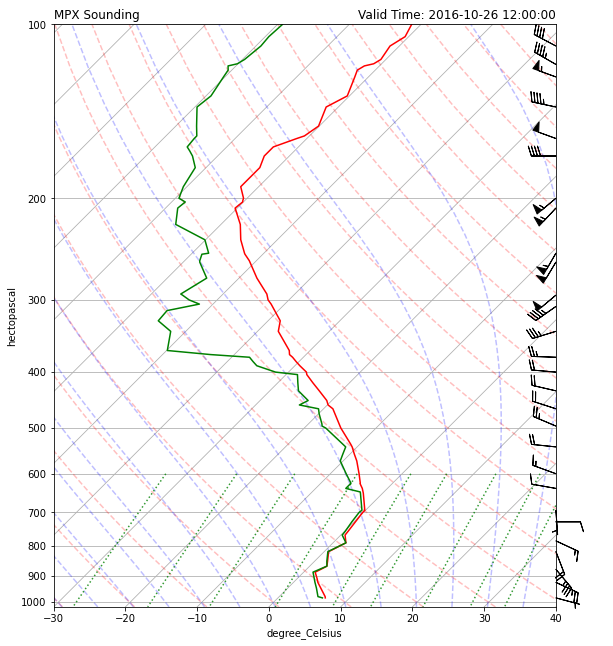

In [7]:
# Change default to be better for skew-T
fig = plt.figure(figsize=(9, 11))

# Initiate the skew-T plot type from MetPy class loaded earlier
skew = SkewT(fig, rotation=45)

# Plot the data using normal plotting functions, in this case using
# log scaling in Y, as dictated by the typical meteorological plot
skew.plot(p, T, 'r')
skew.plot(p, Td, 'g')
skew.plot_barbs(p[::3], u[::3], v[::3], y_clip_radius=0.03)

#skew.plot_barbs(p, u, v, y_clip_radius=0.03)

# Set some appropriate axes limits for x and y
skew.ax.set_xlim(-30, 40)
skew.ax.set_ylim(1020, 100)

# Add the relevant special lines to plot throughout the figure
skew.plot_dry_adiabats(t0=np.arange(233, 533, 10) * units.K,
                       alpha=0.25, color='orangered')
skew.plot_moist_adiabats(t0=np.arange(233, 400, 5) * units.K,
                         alpha=0.25, color='tab:green')

skew.plot_mixing_lines(linestyle='dotted', color='tab:blue')

# Add some descriptive titles
plt.title('{} Sounding'.format(station), loc='left')
plt.title('Valid Time: {}'.format(dt), loc='right')

plt.show()